In [1]:
import numpy as np
from functions import *
from schemes import *
from plot import * 

%matplotlib inline

#### Standard

In [2]:
# gravity
G = 1

# mass ratio & eccentricity 
q = 1.0 # q = m2 / m1
e = 0.8

m1 = 1 # central mass
m2 = q # orbiting mass
mu = G * (m1 + m2) 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,np.sqrt((1 + q)*(1 + e)),0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

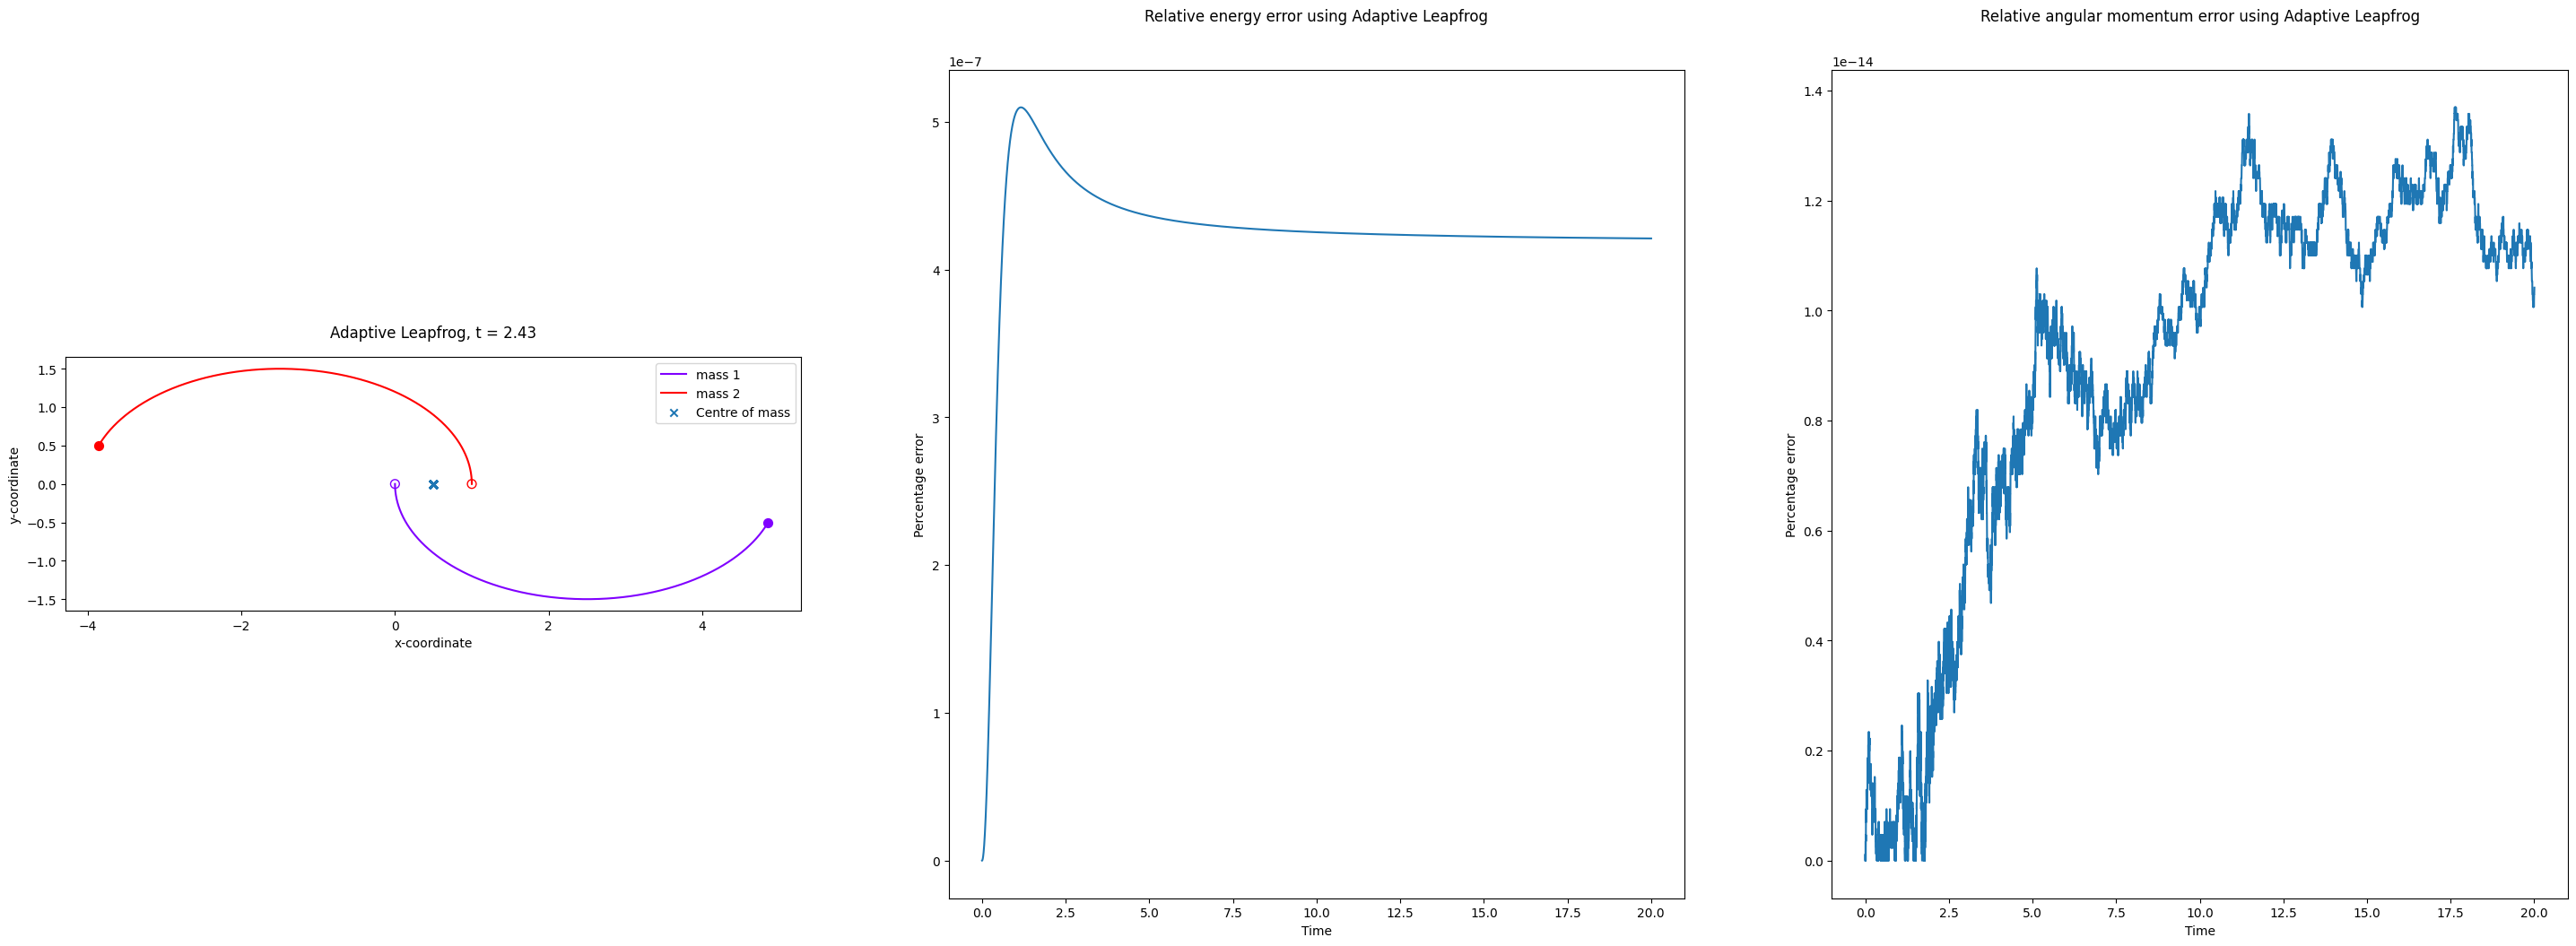

In [3]:
#### Verlet ###
Verlet_traj = run_adaptive_scheme(AdaptiveLeapfrog, 0, 20, 0.01, r0s, v0s, G, masses)
plot2D(Verlet_traj, masses, 'Adaptive Leapfrog')

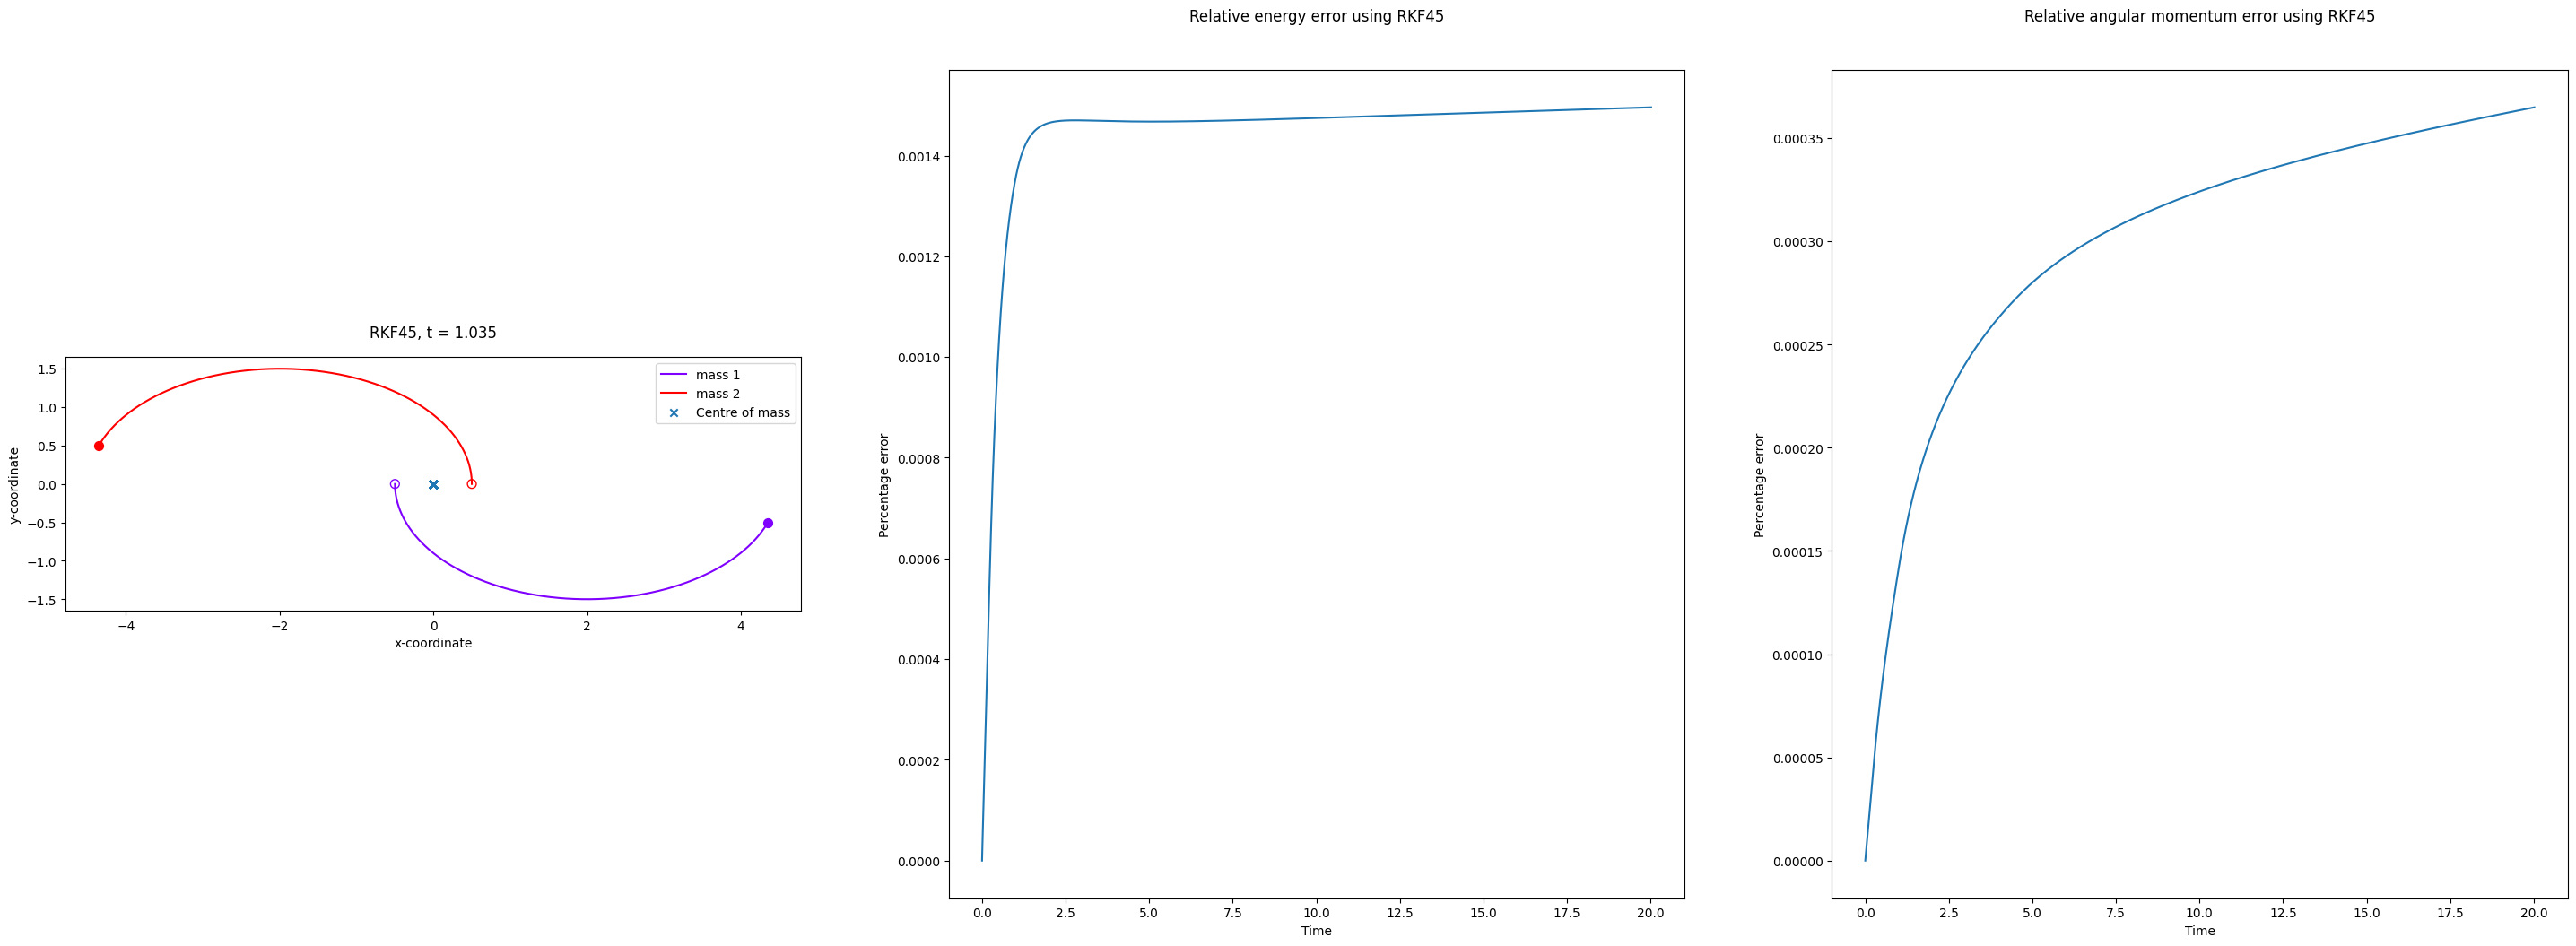

In [4]:
#### RKF45 ###
RKF45_traj = run_adaptive_scheme(RKF45Step, 0, 20, 0.01, r0s, v0s, G, masses)
plot2D(RKF45_traj, masses, 'RKF45')

#### Large mass

In [5]:
# gravity
G = 1

# masses
m1 = 1
m2 = 1e-2 * m1 

# position
r1 = np.array([0,0.0,0.0], dtype="float64")
r2 = np.array([1.0,0.0,0.0], dtype="float64")

# velocity 
v1 = np.array([0,0.0,0], dtype="float64")
v2 = np.array([0,1.0,0], dtype="float64")

# create initial vectors
r0s = np.array([r1,r2])
v0s = np.array([v1,v2])
masses = np.array([m1, m2])

# reposition centre of mass to origin with no momentum 
rcom, vcom = CentreOfMass(r0s, v0s, masses)
r0s -= rcom
v0s -= vcom

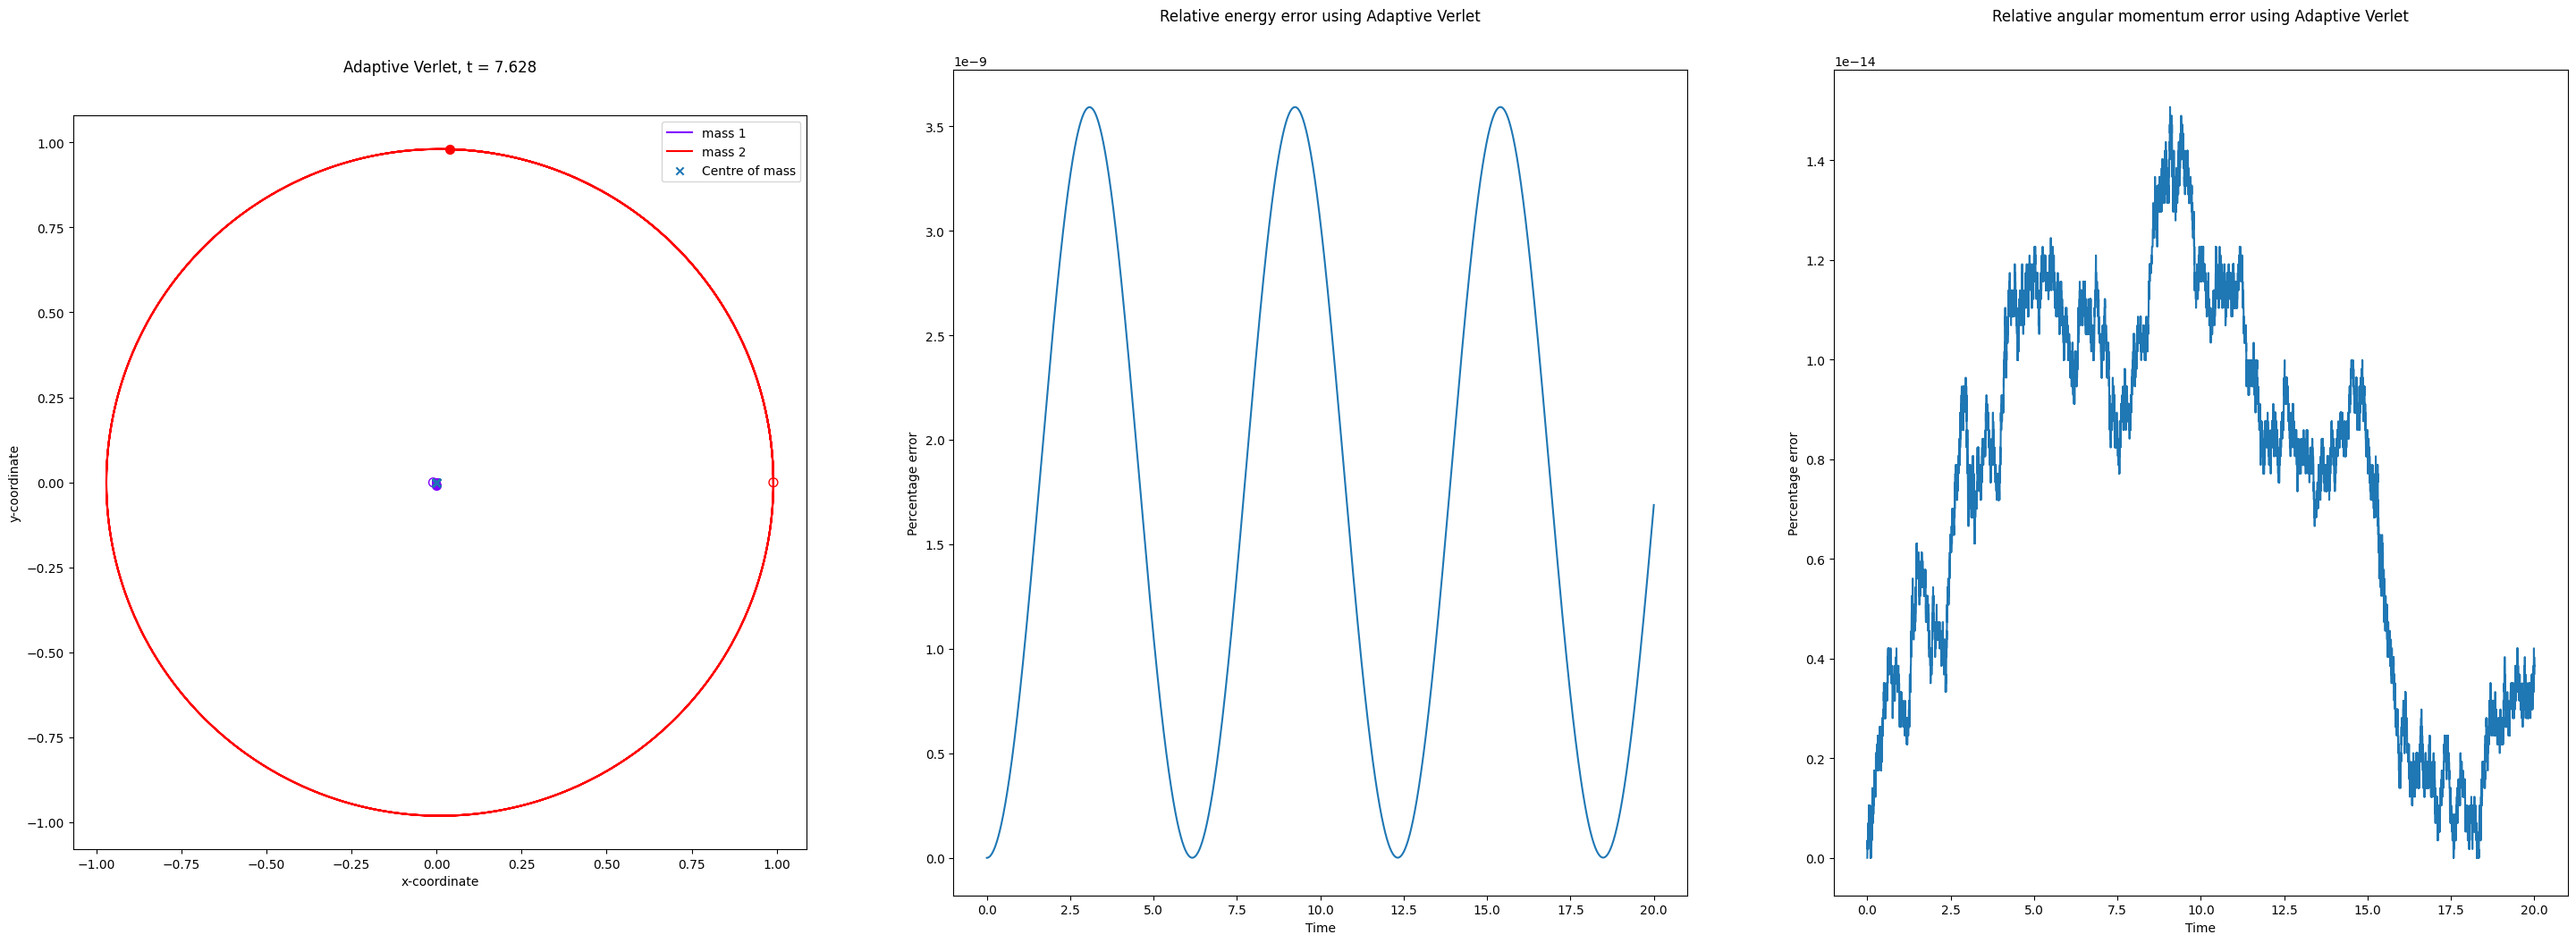

In [6]:
#### Verlet ###
Verlet_traj = run_adaptive_scheme(AdaptiveLeapfrog, 0, 20, 0.01, r0s, v0s, G, masses)
plot2D(Verlet_traj, masses, 'Adaptive Verlet')

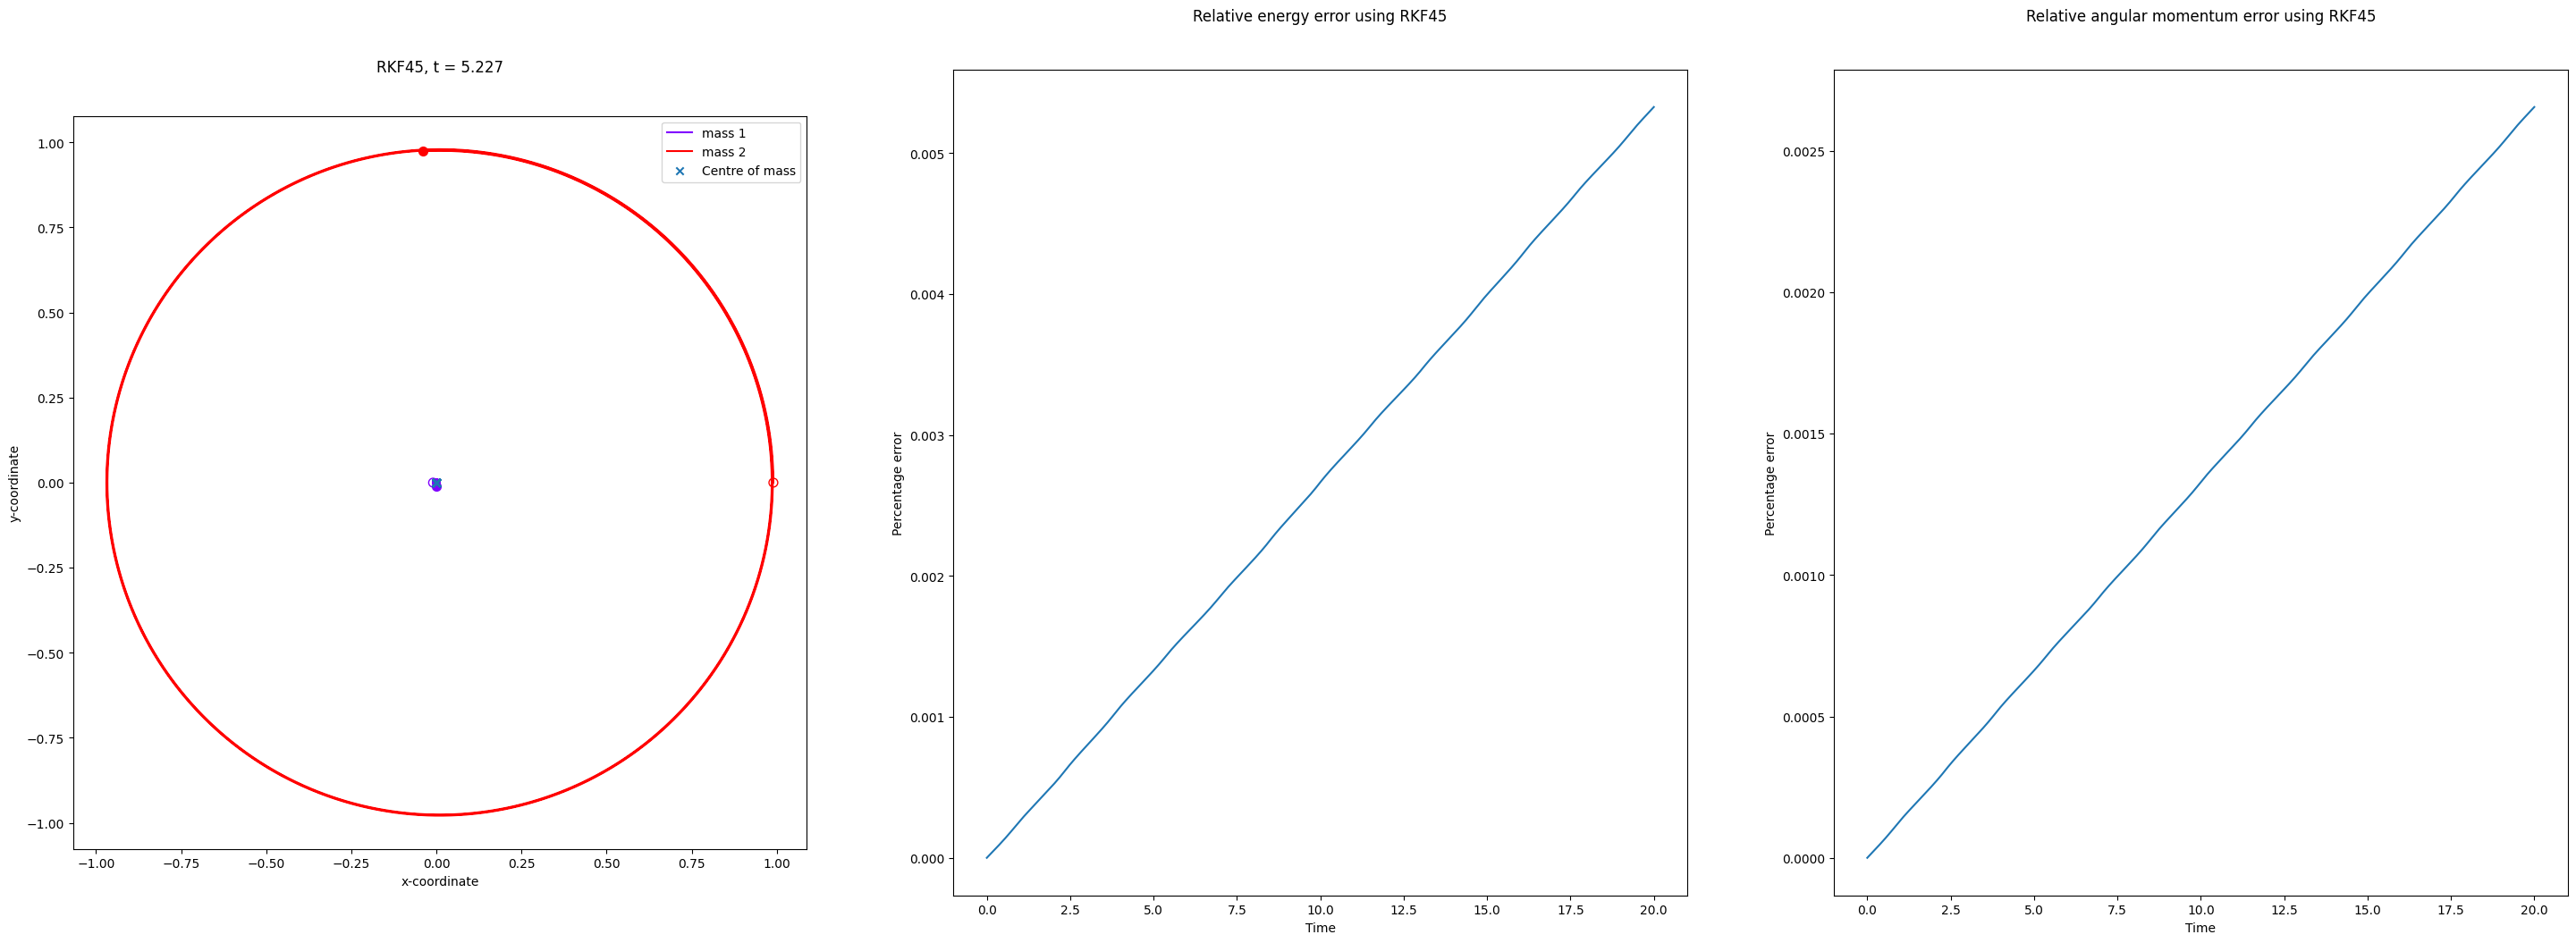

In [7]:
#### RKF45 ###
RKF45_traj = run_adaptive_scheme(RKF45Step, 0, 20, 0.01, r0s, v0s, G, masses)
plot2D(RKF45_traj, masses, 'RKF45')